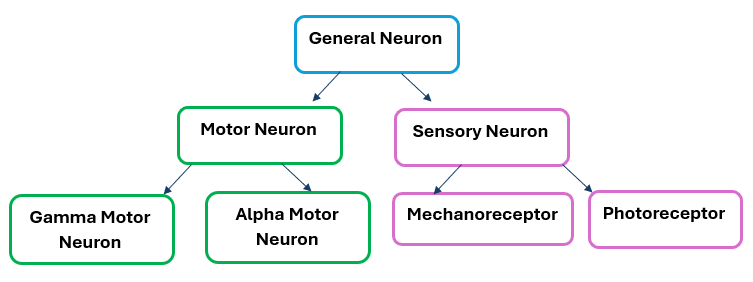

In [ ]:
class General_Neuron:
    def __init__(self,firing_rate):
        self.firing_rate = firing_rate #firing rate - numerical value that represent how frequently the neuron fires in response to a stimulus.
    def activate(stimulus):
        #this function recieve a stimulus and calculate the firing rate according to the strength of that stimulus.
        #this is the Super class! all other subclasses inherit attributes and functions from it.
        pass

class Sensory_Neuron(General_Neuron):
    #A neuron that detects and respons to external stimuli. inherit from the General_Neuron
    def __init__(self,firing_rate,receptor_type):
        super().__init__(firing_rate) #the inherited attribute
        self.receptor_type = receptor_type #the type of stimulus the neuron detects.
    def sense_stimuulus(specific_stimulus):
        #this function get as an input the specific stimulus the neuron is sensitive to, and activate the neuron by the strength or type of that stimulus.
        pass

class Motor_Neuron(General_Neuron):
    """A neuron responsible for initiating muscle movement by sending activation signals to a target muscle. inherit from the general nuron the basic attributes and functions for a neuron."""
    def __init__(self,firing_rate,target_muscle):
        super().__init__(firing_rate) #inherit from the general neuron
        self.target_muscle = target_muscle # the muscle controlled by the neuron.
    def control_muscle(activation_level):
        #this function triggers a response in the target muscle based on the neuron's activation level. 
        pass

class Photoreceptor(Sensory_Neuron):
    '''A sensory neuron --> inherit from the sensory neuron class. sensitive to light'''
    def __init__(self,firing_rate,receptor_type):
        super().__init__(firing_rate, receptor_type = "light") #the inherited attribute
    def light_detection(light_intencity):
        #this function receives light intencity and activates according to light levels.
        pass
    def activate(self): #??????
        super().activate() #extends the functionality of the parent function, but use this child function
        #This function exhibit a behaviour to light detection. for example - incrising firing rate for higer light intensity
        pass

class Mechanoreceptor(Sensory_Neuron):
    '''Asensory neuron --> inhirit from sensory neuron class. responds to pressure.'''
    def __init__(self,firing_rate,receptor_type):
        super().__init__(firing_rate, receptor_type = "pressure")
    def pressure_detection(pressure):
        #this function get a pressure as an input and activates according to the the strength of the applied pressure.
        pass
    def activate(self):
        super().activate() #extends the functionality of the parent function, but use this child function
        #this function produces a unique respond to pressure, and changing the firing rate according to it's level.
        pass

class Alpha_Motor_Neuron(Motor_Neuron):
    '''A motor neuron --> inherit from the motor neuron class. controls skeletal muscles.'''
    def __init__(self, firing_rate,target_muscle):
        super().__init__(firing_rate, target_muscle = "skeletal muscle")
    def skeletal_muscle_control(activation_level):
        # this function initiates muscle contractions or movement in response to its activation level.
        pass
    def activate(self):
        super().activate() #extends the functionality of the parent function, but use this child function
        # this function exhibit the control mechanisms appropriate for skeletal muscles, for example: strong contractions.
        pass
class Gamma_Motor_Neuron(Motor_Neuron):
    '''A motor neuron --> inherit from the motor neuron class. control muscle spindles, helping regulate muscle tone.'''
    def __init__(self,firing_rate,target_muscle):
        super().__init__(firing_rate)
        self.target_muscle = "muscle spindle" # ?????
    def muscle_spindle_control(self):
        # this function adjusts muscle spindle tension in response to activation, affecting muscle tone.
        pass
    def activate(self):
        super().activate() #extends the functionality of the parent function, but use this child function
        # this function present a response spesific to muscle spindles.



: 

In [ ]:
class General_Neuron:
    def __init__(self,firing_rate):
        self.firing_rate = firing_rate #firing rate - numerical value that represent how frequently the neuron fires in response to a stimulus.
    def activate(stimulus):
        #this function recieve a stimulus and calculate the firing rate according to the strength of that stimulus.
        #this is the Super class! all other subclasses inherit attributes and functions from it.
        pass

class Sensory_Neuron(General_Neuron):
    #A neuron that detects and respons to external stimuli. inherit from the General_Neuron
    def __init__(self,firing_rate,receptor_type):
        super().__init__(firing_rate) #the inherited attribute
        self.receptor_type = receptor_type #the type of stimulus the neuron detects.
    def sense_stimuulus(specific_stimulus):
        #this function get as an input the specific stimulus the neuron is sensitive to, and activate the neuron by the strength or type of that stimulus.
        pass

class Motor_Neuron(General_Neuron):
    """A neuron responsible for initiating muscle movement by sending activation signals to a target muscle. inherit from the general nuron the basic attributes and functions for a neuron."""
    def __init__(self,firing_rate,target_muscle):
        super().__init__(firing_rate) #inherit from the general neuron
        self.target_muscle = target_muscle # the muscle controlled by the neuron.
    def control_muscle(activation_level):
        #this function triggers a response in the target muscle based on the neuron's activation level. 
        pass

class Photoreceptor(Sensory_Neuron):
    '''A sensory neuron --> inherit from the sensory neuron class. sensitive to light'''
    def __init__(self,firing_rate,receptor_type):
        super().__init__(firing_rate, receptor_type = "light") #the inherited attribute
    def light_detection(light_intencity):
        #this function receives light intencity and activates according to light levels.
        pass
    def activate(self): #??????
        super().activate() #extends the functionality of the parent function, but use this child function
        #This function exhibit a behaviour to light detection. for example - incrising firing rate for higer light intensity
        pass

class Mechanoreceptor(Sensory_Neuron):
    '''Asensory neuron --> inhirit from sensory neuron class. responds to pressure.'''
    def __init__(self,firing_rate,receptor_type):
        super().__init__(firing_rate, receptor_type = "pressure")
    def pressure_detection(pressure):
        #this function get a pressure as an input and activates according to the the strength of the applied pressure.
        pass
    def activate(self):
        super().activate() #extends the functionality of the parent function, but use this child function
        #this function produces a unique respond to pressure, and changing the firing rate according to it's level.
        pass

class Alpha_Motor_Neuron(Motor_Neuron):
    '''A motor neuron --> inherit from the motor neuron class. controls skeletal muscles.'''
    def __init__(self, firing_rate,target_muscle):
        super().__init__(firing_rate, target_muscle = "skeletal muscle")
    def skeletal_muscle_control(activation_level):
        # this function initiates muscle contractions or movement in response to its activation level.
        pass
    def activate(self):
        super().activate() #extends the functionality of the parent function, but use this child function
        # this function exhibit the control mechanisms appropriate for skeletal muscles, for example: strong contractions.
        pass
class Gamma_Motor_Neuron(Motor_Neuron):
    '''A motor neuron --> inherit from the motor neuron class. control muscle spindles, helping regulate muscle tone.'''
    def __init__(self,firing_rate,target_muscle):
        super().__init__(firing_rate)
        self.target_muscle = "muscle spindle" # ?????
    def muscle_spindle_control(self):
        # this function adjusts muscle spindle tension in response to activation, affecting muscle tone.
        pass
    def activate(self):
        super().activate() #extends the functionality of the parent function, but use this child function
        # this function present a response spesific to muscle spindles.



'Describing of my actions:\n1. i had an error of pykernal so i needed to install this package\n2. i needed to install numpy in the terminal by writing: python -m pip install numpy (i watched an explanation video in youtube and learnd how to do it)'

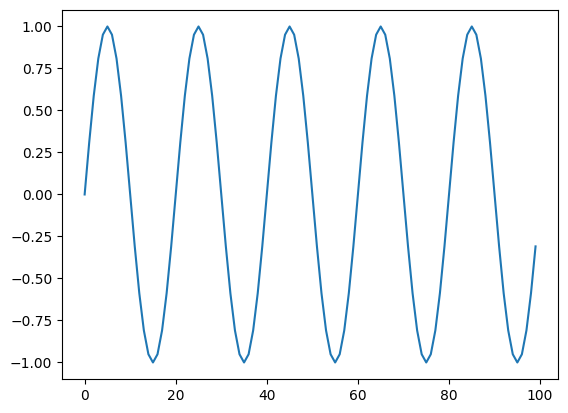

In [12]:
import numpy as np
import matplotlib.pyplot as plt

sin_arr = np.arange(0,1,0.01) # create an array from 0 to 1 with jumps of 0.01
np.clip(sin_arr, a_min= -1, a_max= 1) # clip defined the minimum and maximum points of the function
signal = np.sin(2*np.pi*5*sin_arr)
plt.plot(signal)
'''Describing of my actions:
1. i had an error of pykernal so i needed to install this package
2. i needed to install numpy in the terminal by writing: python -m pip install numpy (i watched an explanation video in youtube and learnd how to do it)'''